In [106]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [107]:
data = pd.read_csv("kc_house_data.csv")

In [108]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

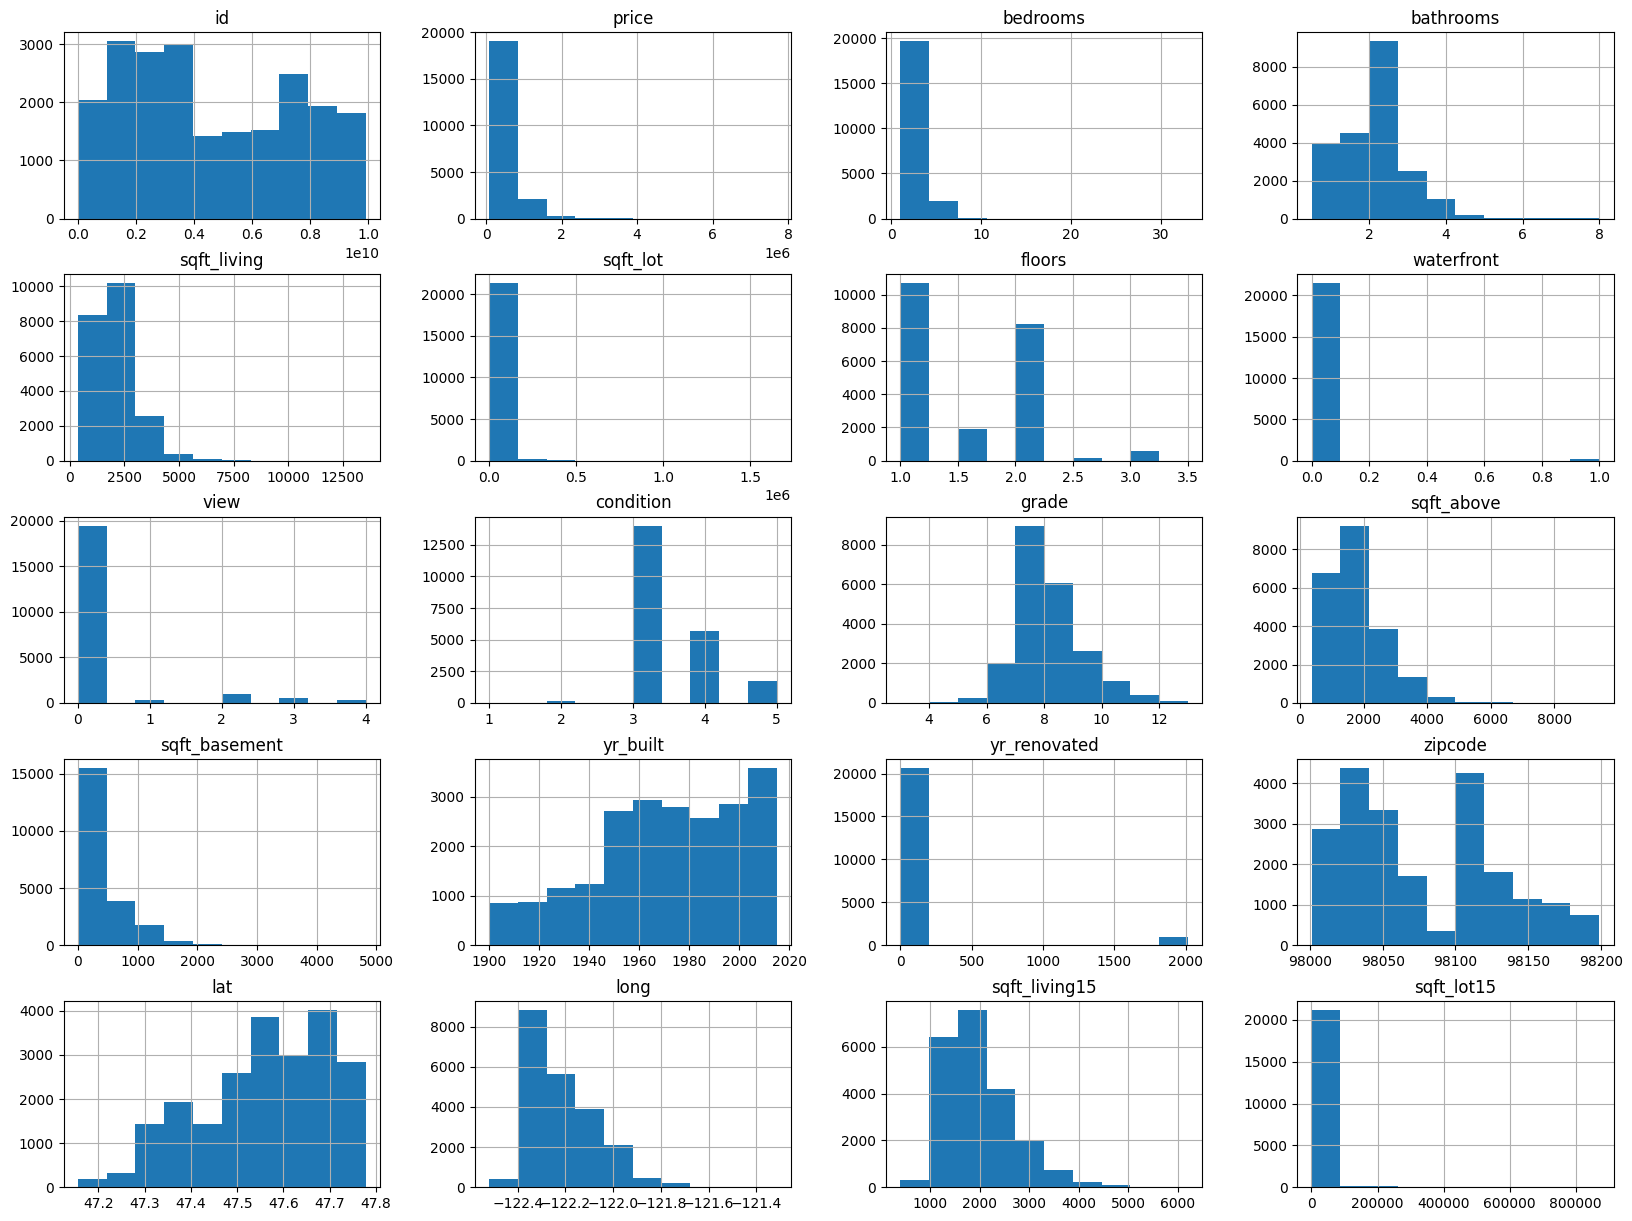

In [109]:
data.hist(figsize=(20,15))

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [111]:
data.drop(['date','waterfront','view','condition'],axis=1,inplace=True)

In [112]:
data.drop(['grade','sqft_above','sqft_basement','yr_built'],axis=1,inplace=True)

In [113]:
data.drop(['yr_renovated','zipcode','sqft_living15','sqft_lot15'],axis=1,inplace=True)

In [114]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,47.6993,-122.346
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,47.5107,-122.362
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,47.5944,-122.299
21595,291310100,400000.0,3,2.50,1600,2388,2.0,47.5345,-122.069


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>]], dtype=object)

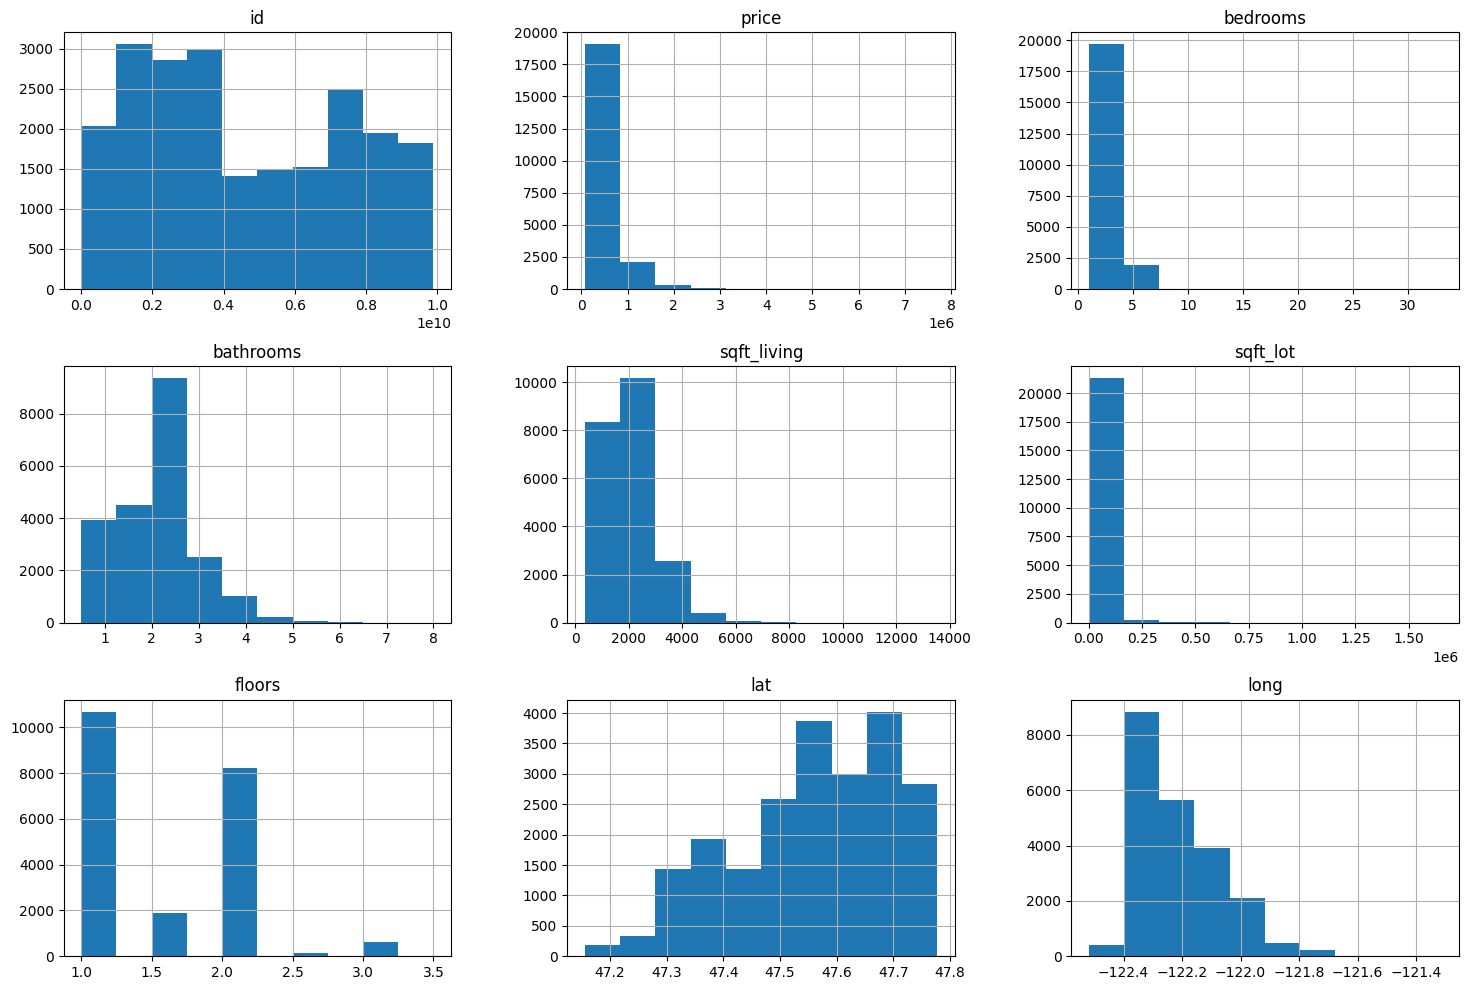

In [115]:
data.hist(figsize=(18,12))

In [116]:
y=data[['price']].values
x=data.drop(['id','price'],axis=1).values

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [118]:
L=LinearRegression()
L.fit(x_train,y_train)

LinearRegression()

In [119]:
predict_y=L.predict(x_test)
print("PREDICTED PRICE OF THE HOUSE\n\n",predict_y)
print("\n\n")
print("ACTUAL PRICE OF THE HOUSE\n\n",y_test)

PREDICTED PRICE OF THE HOUSE

 [[693389.89358009]
 [250593.87325366]
 [371875.27792417]
 ...
 [760602.55820616]
 [561221.83926812]
 [579005.00252236]]



ACTUAL PRICE OF THE HOUSE

 [[700000.]
 [370000.]
 [400000.]
 ...
 [704000.]
 [935000.]
 [561000.]]


In [120]:
print("COEFFICIENT OF DETERMINATION %.3f"% r2_score(y_test,predict_y))

COEFFICIENT OF DETERMINATION 0.574


[]

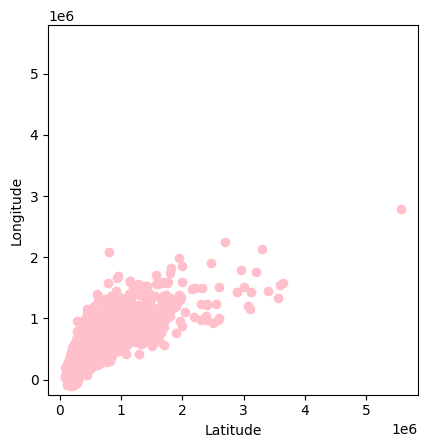

In [139]:
plt.scatter(y_test,predict_y,color="pink")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.axis('square')
plt.plot()